# Plotting Orbital Elements of Kepler-11

Kepler-11 and its 6 planets simulated with 20 co-orbitals each over a span of $10^5$ years. Plots include the difference in mean longitude between each co-orbital and its planet, eccentricities, and inclinations.

### Kepler-11b

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import rebound

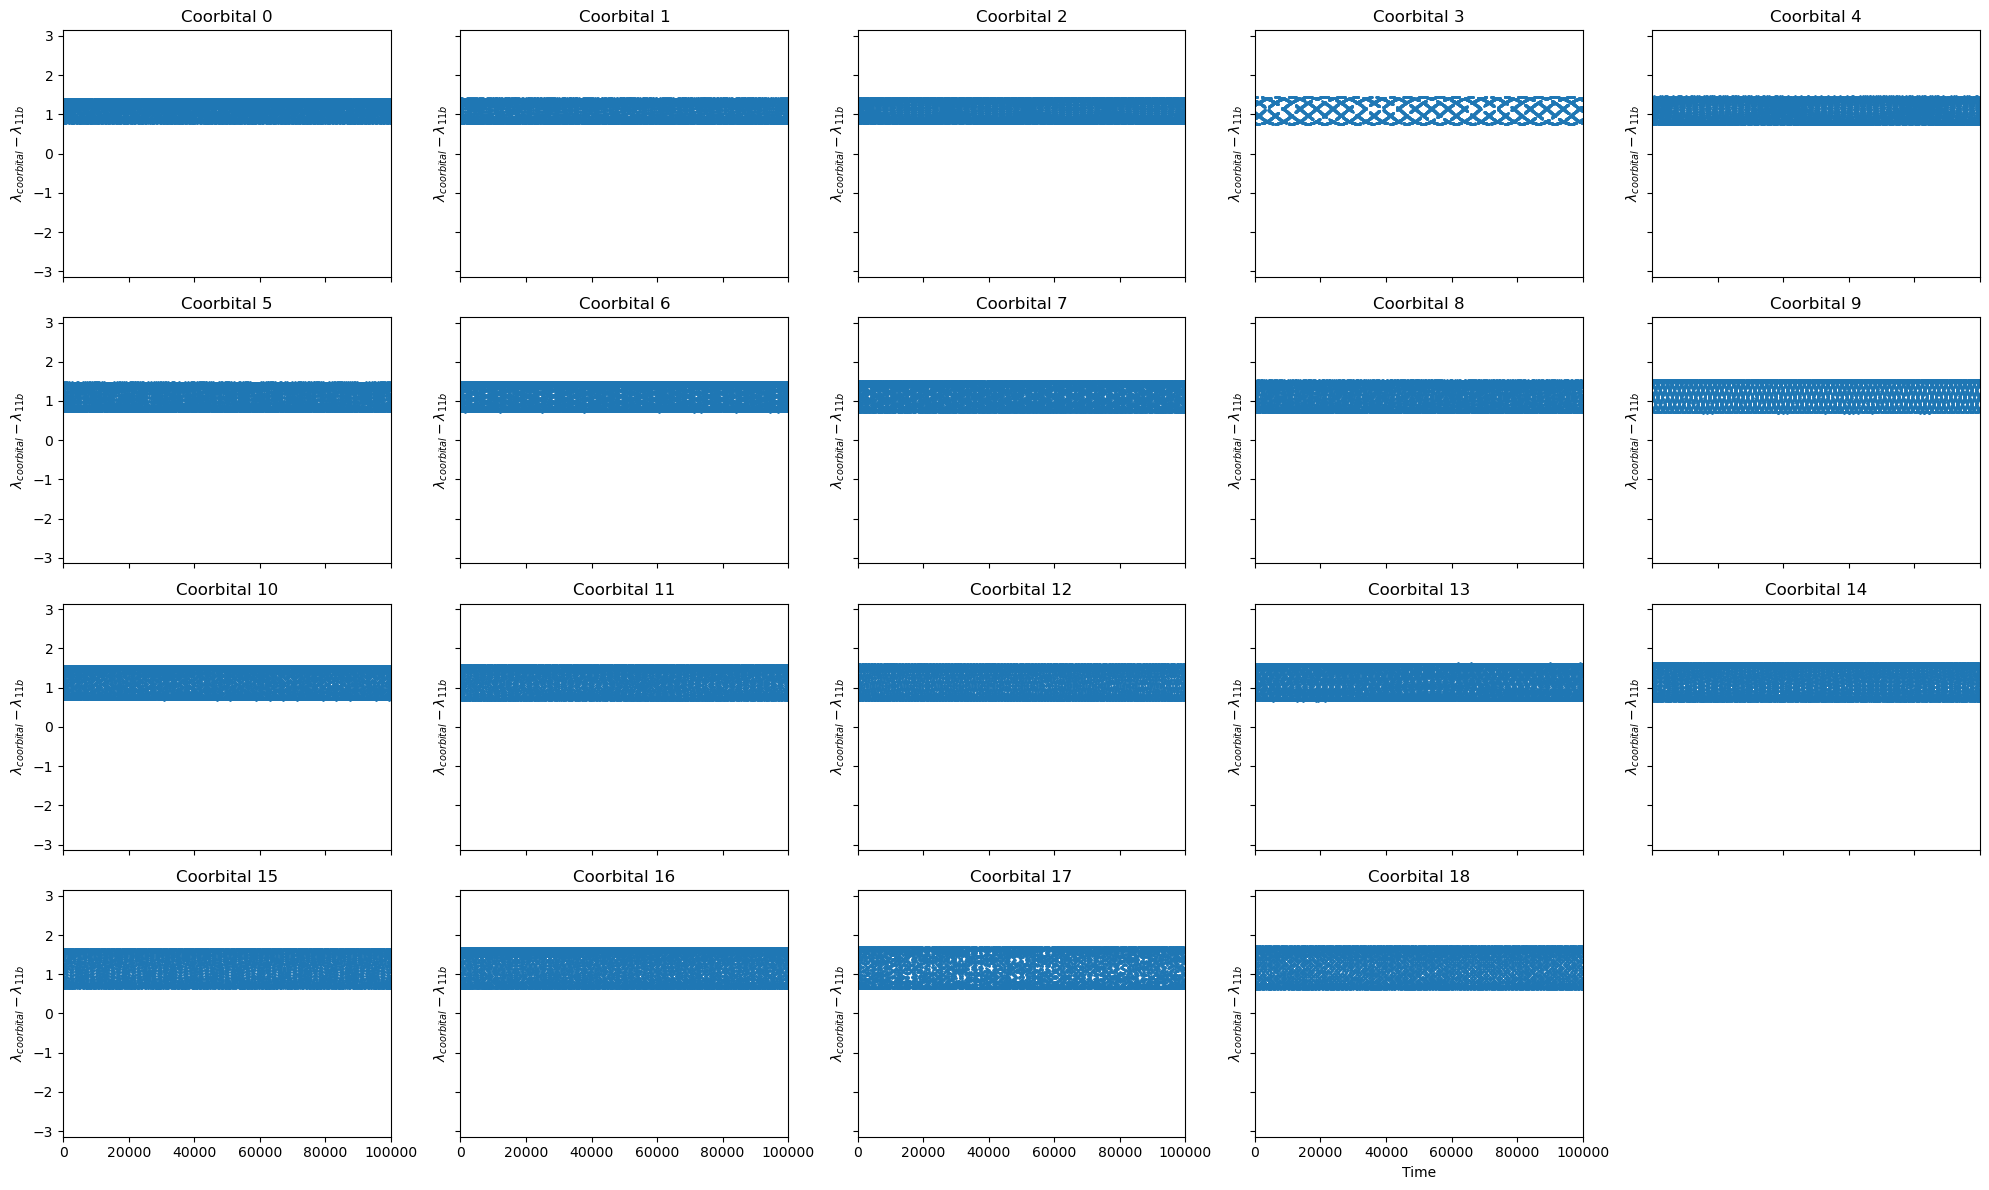

In [17]:
# Load the simulation archive
sa = rebound.Simulationarchive("kepler_11b.bin")

# Get the time range and number of snapshots
tmax = sa.tmax
tmin = sa.tmin
nshots = len(sa)

# Generate an array of times corresponding to the snapshots
times = np.linspace(tmin, tmax, nshots)

# Initialize a list to hold the mean longitude differences
mean_longitude_differences = []

# Iterate over each snapshot
for i in range(nshots):
    sim = sa[i]  # Load the i-th snapshot
    mean_longitudes = []

    # Extract mean longitudes for particles after the first 8 (sun and planets)
    for j in range(8, sim.N):
        particle = sim.particles[j]
        mean_longitudes.append(particle.l)

    # Calculate the mean longitude of Kepler-11b (assumed to be the second particle, index 1)
    kepler_11b = sim.particles[1]
    kepler_11b_mean_longitude = kepler_11b.l

    # Calculate the differences and store them
    differences = np.array(mean_longitudes) - kepler_11b_mean_longitude
    mean_longitude_differences.append(differences)

# Convert the list of arrays to a 2D array for plotting
mean_longitude_differences = np.array(mean_longitude_differences)

# Determine the number of particles
n_particles = mean_longitude_differences.shape[1]

# Calculate the grid size for subplots
n_cols = 5
n_rows = (n_particles + n_cols - 1) // n_cols

# Create subplots
fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, 3*n_rows), sharex=True, sharey=True)

# Flatten the array of axes for easy iteration
axs = axs.flatten()

# Set y-axis limits
ymax = np.pi
ymin = -np.pi
xmin = tmin
xmax = tmax

# Plot each particle's mean longitude difference in a separate subplot
for i in range(n_particles):
    axs[i].plot(times, mean_longitude_differences[:, i], marker='o', markersize=1, linestyle='None')
    axs[i].set_ylabel(f'$\lambda_{{coorbital}} - \lambda_{{11b}}$')
    axs[i].set_title(f'Coorbital {i}')
    axs[i].set_ylim(ymin, ymax)
    axs[i].set_xlim(xmin, xmax)

# Remove empty subplots
for i in range(n_particles, len(axs)):
    fig.delaxes(axs[i])

# Set common x-axis label
plt.xlabel('Time')

# Adjust layout to prevent overlap
plt.tight_layout()

plt.savefig('11b_mean_long.png')

# Show the plot
plt.show()

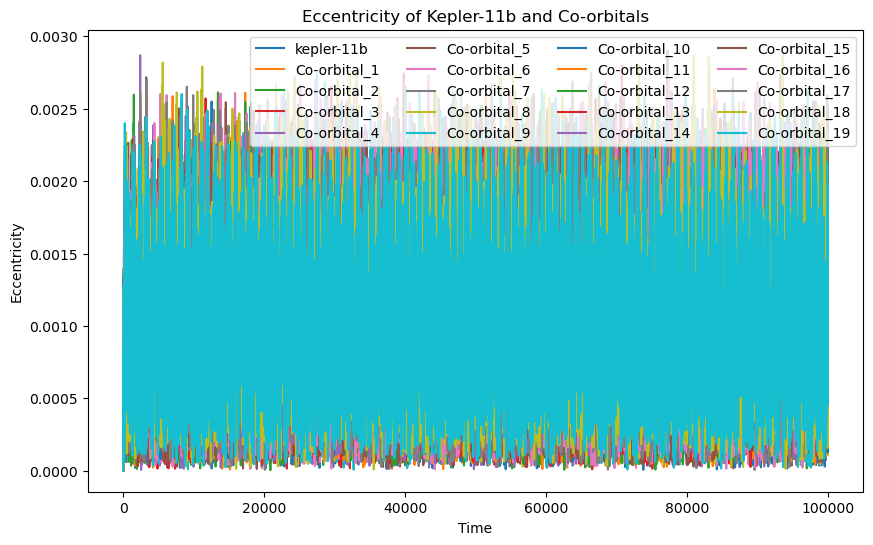

In [14]:
# filenames = ["kepler_11b.bin","kepler_11c.bin","kepler_11d.bin","kepler_11e.bin","kepler_11f.bin","kepler_11g.bin","kepler_11h.bin"]
filenames = ["kepler_11b.bin"]

for filename in filenames:
    sa = rebound.Simulationarchive(filename)

    tmax = sa.tmax
    tmin = sa.tmin
    nshots = len(sa)  # number of snapshots

    times = np.linspace(tmin, tmax, nshots)

    eccentricities = []   # Store eccentricity values for Kepler-11b and its co-orbitals

    # Load in each snapshot
    for i in range(nshots):
        ps = sa[i].particles  # particles at snapshot i
        os = sa[i].orbits()#  # orbits relative to the primary particle

        # List to hold eccentricity for the current snapshot
        ecc_snapshot = []

        for j in range(len(os)):
            ecc_snapshot.append(os[j].e)

        # Append the list of eccentricities for the current snapshot
        eccentricities.append(ecc_snapshot)

    # Plot eccentricity versus time for kepler-11b and its co-orbitals
    eccentricities = np.array(eccentricities)
    plt.figure(figsize=(10, 6))
    plt.plot(times, eccentricities[:, 0], label='kepler-11b')
    for j in range(7, len(os)):  # Indices 7-26 represent co-orbitals
        plt.plot(times, eccentricities[:, j], label=f'Co-orbital_{j-6}')  # Label starts from Co-orbital_1
    plt.xlabel('Time')
    plt.ylabel('Eccentricity')
    plt.title('Eccentricity of Kepler-11b and Co-orbitals')
    plt.legend(ncol=4)  # Set the number of columns in the legend
    plt.savefig('11b_eccs.png')
    plt.show()

### kepler-11c

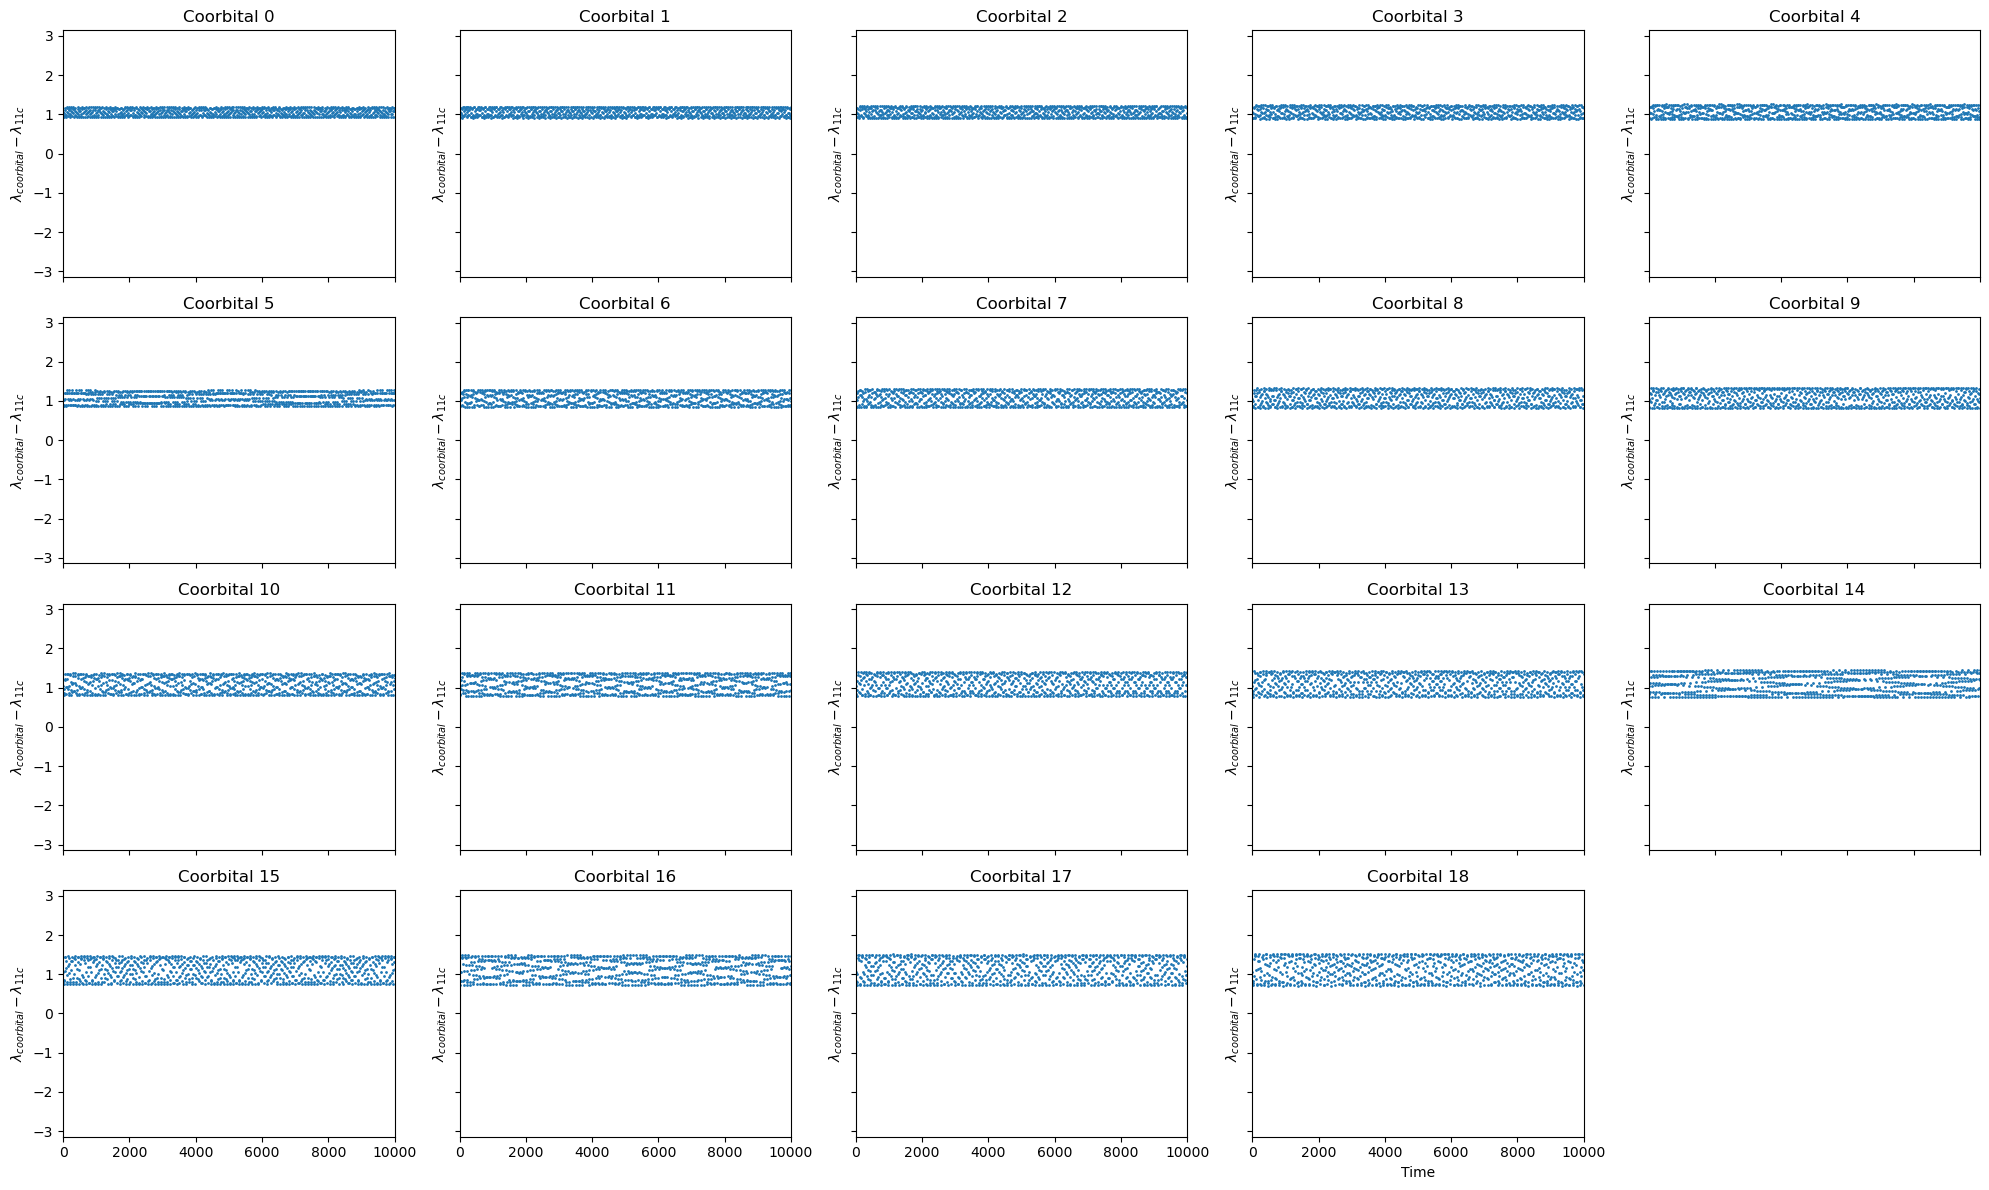

In [4]:
# Load the simulation archive
sa = rebound.Simulationarchive("kepler_11c.bin")

# Get the time range and number of snapshots
tmax = sa.tmax
tmin = sa.tmin
nshots = len(sa)

# Generate an array of times corresponding to the snapshots
times = np.linspace(tmin, tmax, nshots)

# Initialize a list to hold the mean longitude differences
mean_longitude_differences = []

# Iterate over each snapshot
for i in range(nshots):
    sim = sa[i]  # Load the i-th snapshot
    mean_longitudes = []

    # Extract mean longitudes for particles after the first 8 (sun and planets)
    for j in range(8, sim.N):
        particle = sim.particles[j]
        mean_longitudes.append(particle.l)

    # Calculate the mean longitude of kepler-11c (assumed to be the third particle, index 2)
    kepler_11c = sim.particles[2]
    kepler_11c_mean_longitude = kepler_11c.l

    # Calculate the differences and store them
    differences = np.array(mean_longitudes) - kepler_11c_mean_longitude
    mean_longitude_differences.append(differences)

# Convert the list of arrays to a 2D array for plotting
mean_longitude_differences = np.array(mean_longitude_differences)

# Determine the number of particles
n_particles = mean_longitude_differences.shape[1]

# Calculate the grid size for subplots
n_cols = 5
n_rows = (n_particles + n_cols - 1) // n_cols

# Create subplots
fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, 3*n_rows), sharex=True, sharey=True)

# Flatten the array of axes for easy iteration
axs = axs.flatten()

# Set y-axis limits
ymax = np.pi
ymin = -np.pi
xmin = tmin
xmax = 10000

# Plot each particle's mean longitude difference in a separate subplot
for i in range(n_particles):
    axs[i].plot(times, mean_longitude_differences[:, i], marker='o', markersize=1, linestyle='None')
    axs[i].set_ylabel(f'$\lambda_{{coorbital}} - \lambda_{{11c}}$')
    axs[i].set_title(f'Coorbital {i}')
    axs[i].set_ylim(ymin, ymax)
    axs[i].set_xlim(xmin, xmax)

# Remove empty subplots
for i in range(n_particles, len(axs)):
    fig.delaxes(axs[i])

# Set common x-axis label
plt.xlabel('Time')

# Adjust layout to prevent overlap
plt.tight_layout()

plt.savefig('11c_mean_long.png')

# Show the plot
plt.show()


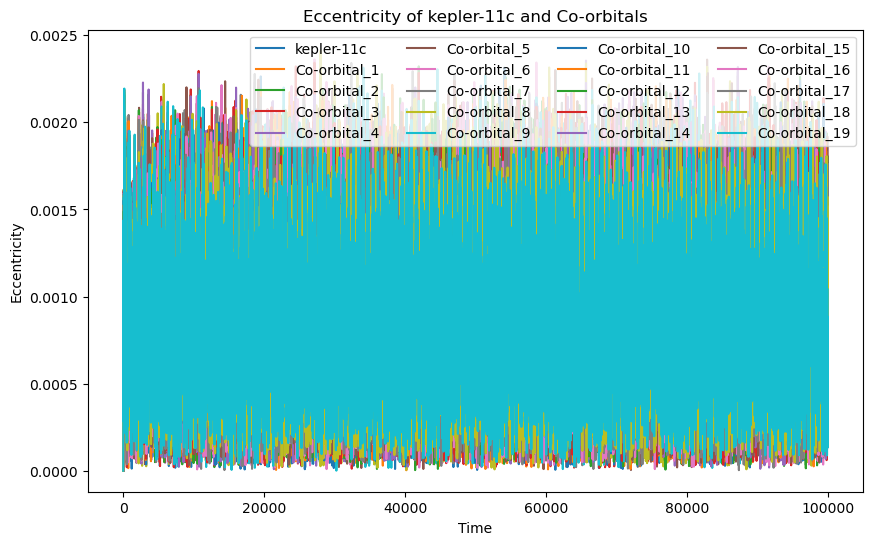

In [5]:
# filenames = ["kepler_11c.bin","kepler_11c.bin","kepler_11d.bin","kepler_11e.bin","kepler_11f.bin","kepler_11g.bin","kepler_11h.bin"]
filenames = ["kepler_11c.bin"]

for filename in filenames:
    sa = rebound.Simulationarchive(filename)

    tmax = sa.tmax
    tmin = sa.tmin
    nshots = len(sa)  # number of snapshots

    times = np.linspace(tmin, tmax, nshots)

    eccentricities = []   # Store eccentricity values for kepler-11c and its co-orbitals

    # Load in each snapshot
    for i in range(nshots):
        ps = sa[i].particles  # particles at snapshot i
        os = sa[i].orbits()#  # orbits relative to the primary particle

        # List to hold eccentricity for the current snapshot
        ecc_snapshot = []

        for j in range(len(os)):
            ecc_snapshot.append(os[j].e)

        # Append the list of eccentricities for the current snapshot
        eccentricities.append(ecc_snapshot)

    # Plot eccentricity versus time for kepler-11c and its co-orbitals
    eccentricities = np.array(eccentricities)
    plt.figure(figsize=(10, 6))
    plt.plot(times, eccentricities[:, 1], label='kepler-11c')
    for j in range(7, len(os)):  # Indices 7-26 represent co-orbitals
        plt.plot(times, eccentricities[:, j], label=f'Co-orbital_{j-6}')  # Label starts from Co-orbital_1
    plt.xlabel('Time')
    plt.ylabel('Eccentricity')
    plt.title('Eccentricity of kepler-11c and Co-orbitals')
    plt.legend(ncol=4)  # Set the number of columns in the legend
    plt.savefig('11c_eccs.png')
    plt.show()

### kepler-11d

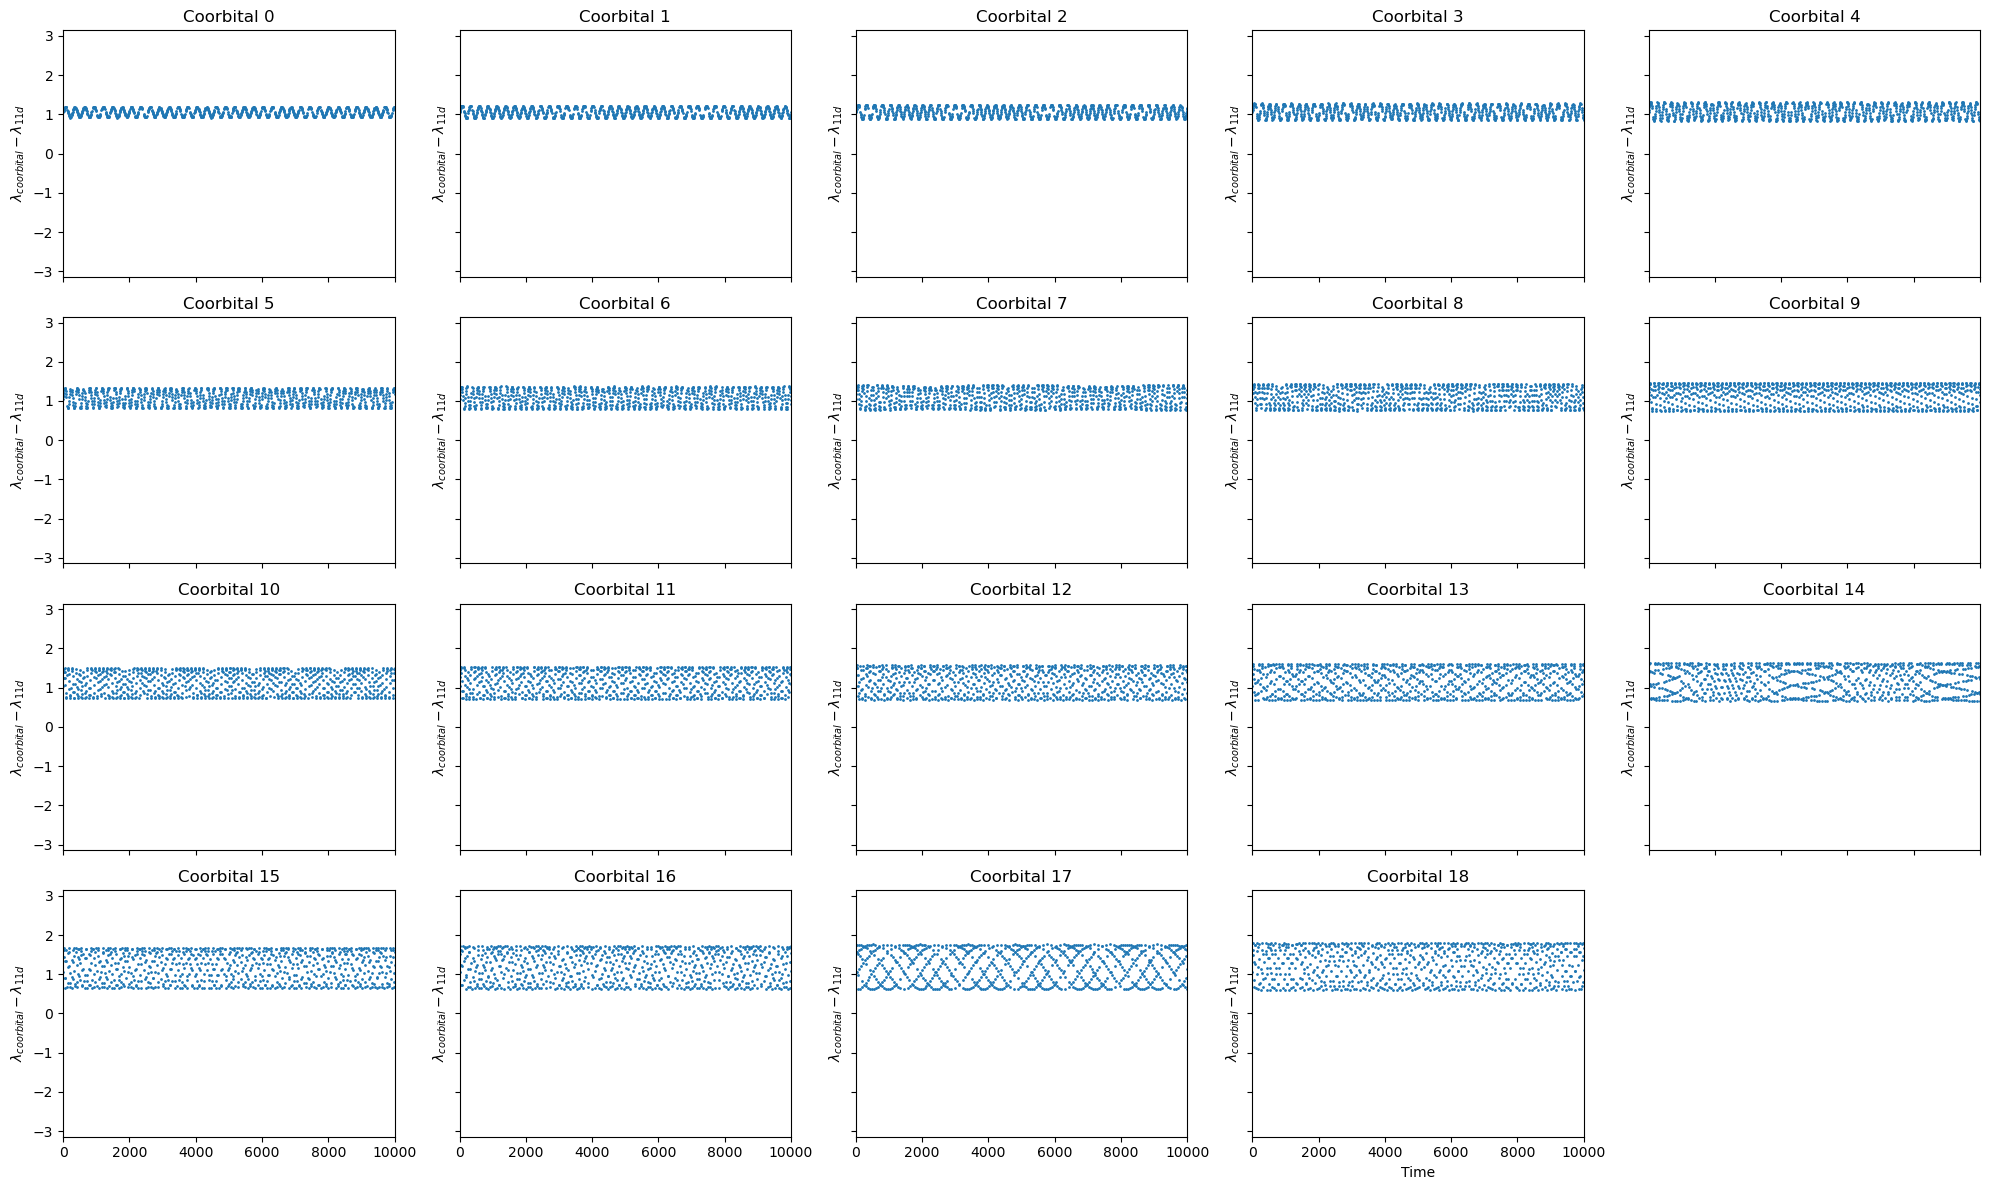

In [6]:
# Load the simulation archive
sa = rebound.Simulationarchive("kepler_11d.bin")

# Get the time range and number of snapshots
tmax = sa.tmax
tmin = sa.tmin
nshots = len(sa)

# Generate an array of times corresponding to the snapshots
times = np.linspace(tmin, tmax, nshots)

# Initialize a list to hold the mean longitude differences
mean_longitude_differences = []

# Iterate over each snapshot
for i in range(nshots):
    sim = sa[i]  # Load the i-th snapshot
    mean_longitudes = []

    # Extract mean longitudes for particles after the first 8 (sun and planets)
    for j in range(8, sim.N):
        particle = sim.particles[j]
        mean_longitudes.append(particle.l)

    # Calculate the mean longitude of kepler-11d (assumed to be the fourth particle, index 3)
    kepler_11d = sim.particles[3]
    kepler_11d_mean_longitude = kepler_11d.l

    # Calculate the differences and store them
    differences = np.array(mean_longitudes) - kepler_11d_mean_longitude
    mean_longitude_differences.append(differences)

# Determine the maximum number of particles across all snapshots
max_particles = max(len(d) for d in mean_longitude_differences)

# Pad arrays to ensure consistent length
mean_longitude_differences_padded = [np.pad(d, (0, max_particles - len(d)), 'constant', constant_values=np.nan) for d in mean_longitude_differences]

# Convert the list of arrays to a 2D array for plotting
mean_longitude_differences = np.array(mean_longitude_differences_padded)

# Determine the number of particles
n_particles = mean_longitude_differences.shape[1]

# Calculate the grid size for subplots
n_cols = 5
n_rows = (n_particles + n_cols - 1) // n_cols

# Create subplots
fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, 3*n_rows), sharex=True, sharey=True)

# Flatten the array of axes for easy iteration
axs = axs.flatten()

# Set y-axis limits
ymax = np.pi
ymin = -np.pi
xmin = tmin
xmax = 10000

# Plot each particle's mean longitude difference in a separate subplot
for i in range(n_particles):
    axs[i].plot(times, mean_longitude_differences[:, i], marker='o', markersize=1, linestyle='None')
    axs[i].set_ylabel(f'$\lambda_{{coorbital}} - \lambda_{{11d}}$')
    axs[i].set_title(f'Coorbital {i}')
    axs[i].set_ylim(ymin, ymax)
    axs[i].set_xlim(xmin, xmax)

# Remove empty subplots
for i in range(n_particles, len(axs)):
    fig.delaxes(axs[i])

# Set common x-axis label
plt.xlabel('Time')

# Adjust layout to prevent overlap
plt.tight_layout()

plt.savefig('11d_mean_long.png')

# Show the plot
plt.show()

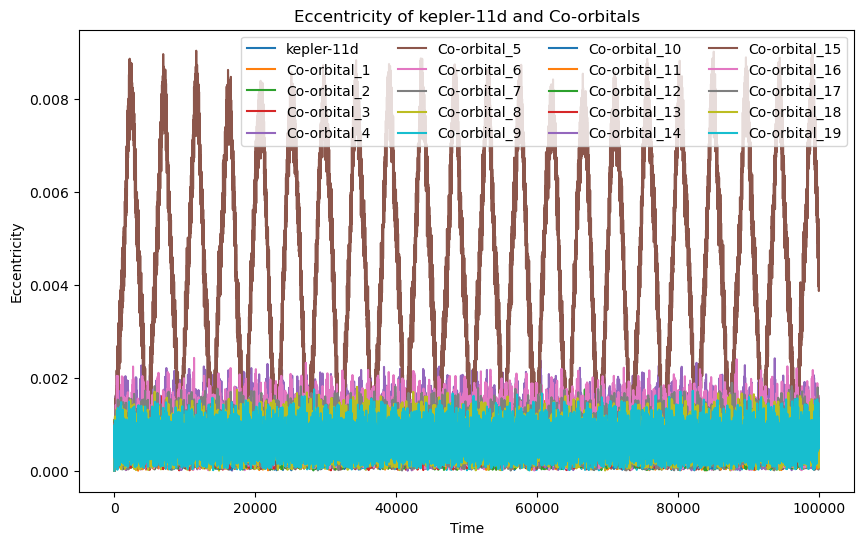

In [7]:
# filenames = ["kepler_11d.bin","kepler_11d.bin","kepler_11d.bin","kepler_11e.bin","kepler_11f.bin","kepler_11g.bin","kepler_11h.bin"]
filenames = ["kepler_11d.bin"]

for filename in filenames:
    sa = rebound.Simulationarchive(filename)

    tmax = sa.tmax
    tmin = sa.tmin
    nshots = len(sa)  # number of snapshots

    times = np.linspace(tmin, tmax, nshots)

    eccentricities = []   # Store eccentricity values for kepler-11d and its co-orbitals

    # Load in each snapshot
    for i in range(nshots):
        ps = sa[i].particles  # particles at snapshot i
        os = sa[i].orbits()#  # orbits relative to the primary particle

        # List to hold eccentricity for the current snapshot
        ecc_snapshot = []

        for j in range(len(os)):
            ecc_snapshot.append(os[j].e)

        # Append the list of eccentricities for the current snapshot
        eccentricities.append(ecc_snapshot)

    # Find the maximum number of orbital elements in any snapshot
    max_len = max(len(ecc) for ecc in eccentricities)

    # Pad eccentricity lists with NaN to make them all the same length
    eccentricities_padded = np.array([ecc + [np.nan]*(max_len - len(ecc)) for ecc in eccentricities])

    # Plot eccentricity versus time for kepler-11d and its co-orbitals
    plt.figure(figsize=(10, 6))
    plt.plot(times, eccentricities_padded[:, 2], label='kepler-11d')
    for j in range(7, max_len):  # Indices 7-26 represent co-orbitals
        plt.plot(times, eccentricities_padded[:, j], label=f'Co-orbital_{j-6}')  # Label starts from Co-orbital_1
    plt.xlabel('Time')
    plt.ylabel('Eccentricity')
    plt.title('Eccentricity of kepler-11d and Co-orbitals')
    plt.legend(ncol=4)  # Set the number of columns in the legend
    plt.savefig('11d_eccs.png')
    plt.show()

### kepler-11e

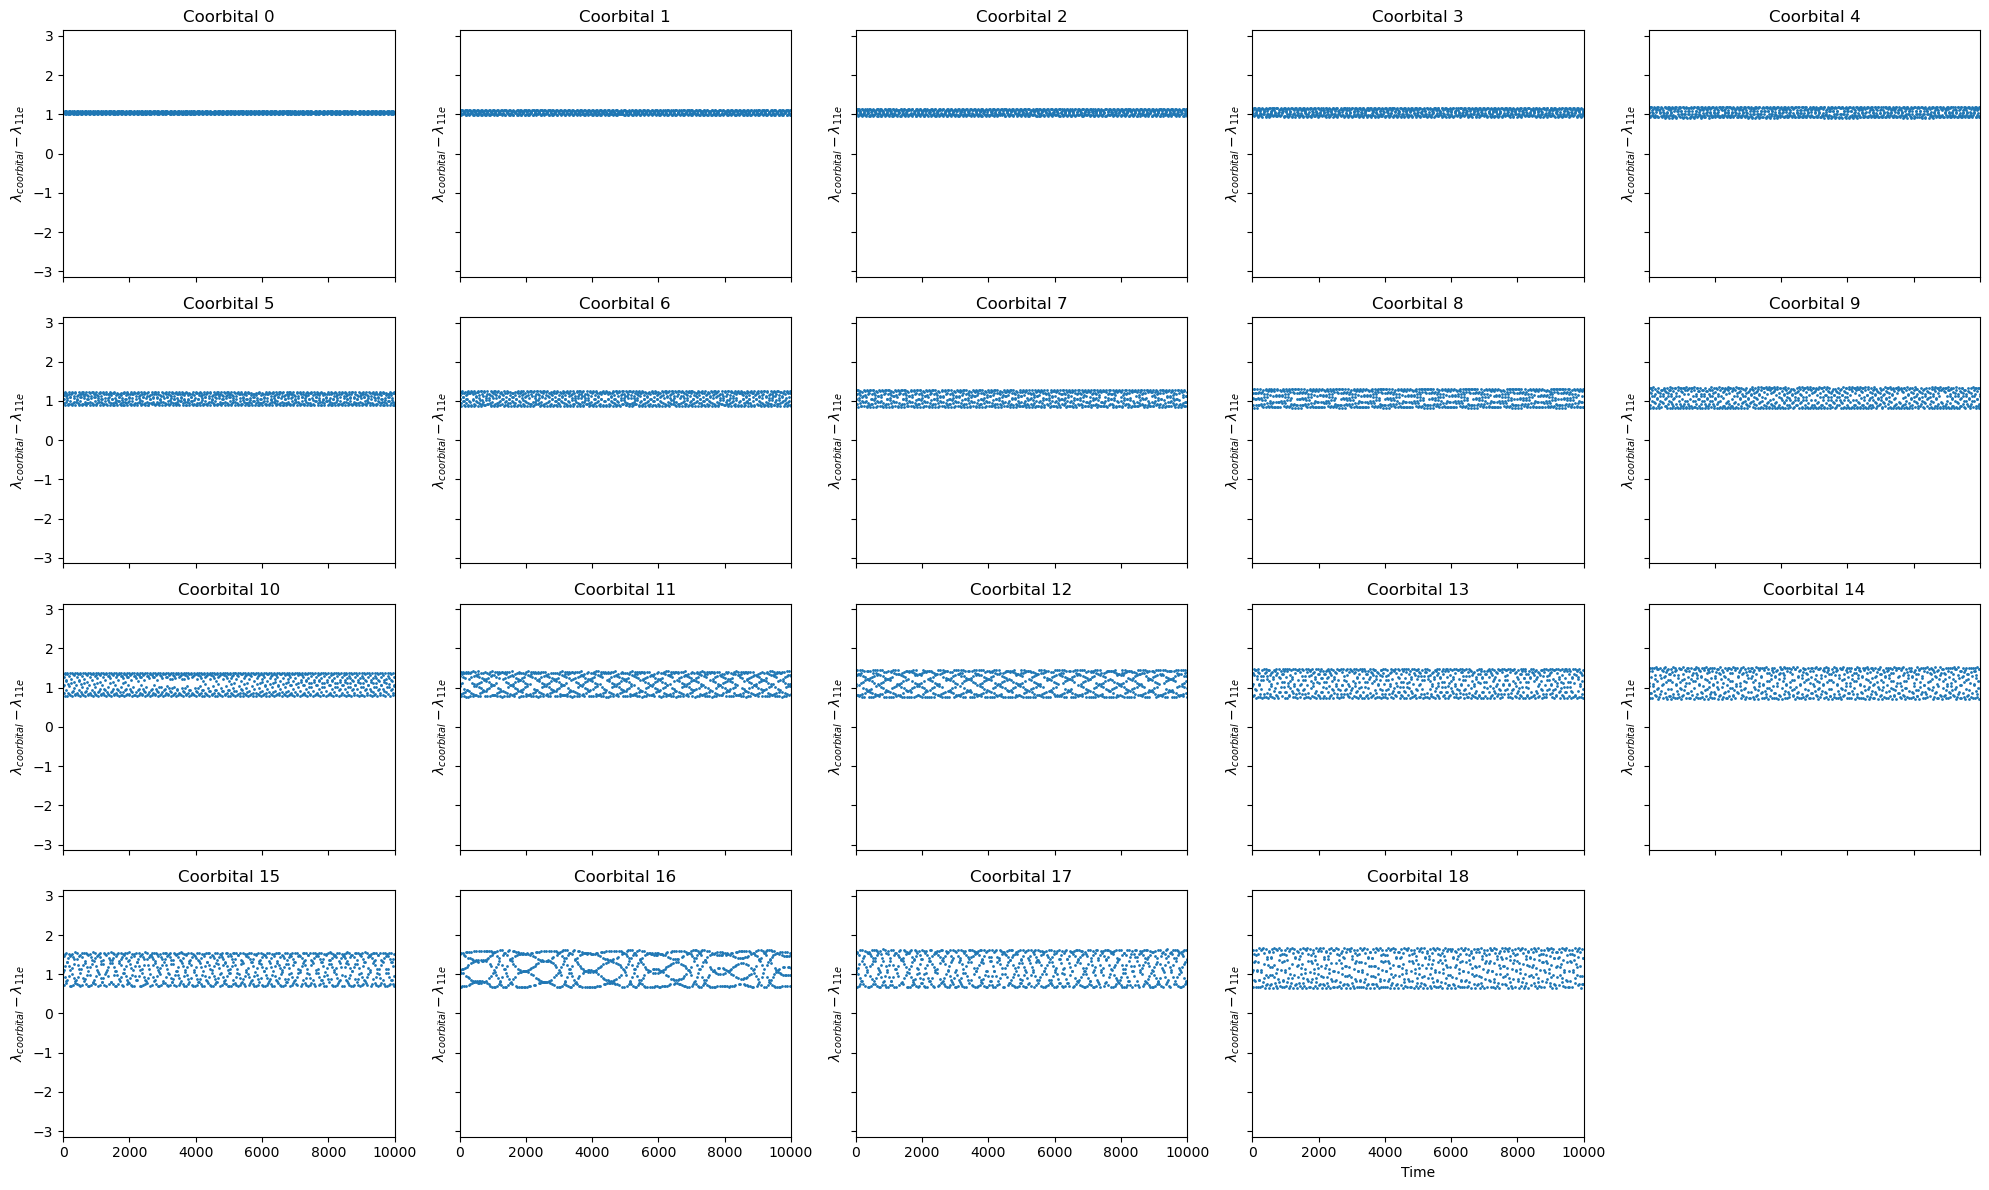

In [8]:
# Load the simulation archive
sa = rebound.Simulationarchive("kepler_11e.bin")

# Get the time range and number of snapshots
tmax = sa.tmax
tmin = sa.tmin
nshots = len(sa)

# Generate an array of times corresponding to the snapshots
times = np.linspace(tmin, tmax, nshots)

# Initialize a list to hold the mean longitude differences
mean_longitude_differences = []

# Iterate over each snapshot
for i in range(nshots):
    sim = sa[i]  # Load the i-th snapshot
    mean_longitudes = []

    # Extract mean longitudes for particles after the first 8 (sun and planets)
    for j in range(8, sim.N):
        particle = sim.particles[j]
        mean_longitudes.append(particle.l)

    # Calculate the mean longitude of kepler-11e (assumed to be the fifth particle, index 4)
    kepler_11e = sim.particles[4]
    kepler_11e_mean_longitude = kepler_11e.l

    # Calculate the differences and store them
    differences = np.array(mean_longitudes) - kepler_11e_mean_longitude
    mean_longitude_differences.append(differences)

# Determine the maximum number of particles across all snapshots
max_particles = max(len(d) for d in mean_longitude_differences)

# Pad arrays to ensure consistent length
mean_longitude_differences_padded = [np.pad(d, (0, max_particles - len(d)), 'constant', constant_values=np.nan) for d in mean_longitude_differences]

# Convert the list of arrays to a 2D array for plotting
mean_longitude_differences = np.array(mean_longitude_differences_padded)

# Determine the number of particles
n_particles = mean_longitude_differences.shape[1]

# Calculate the grid size for subplots
n_cols = 5
n_rows = (n_particles + n_cols - 1) // n_cols

# Create subplots
fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, 3*n_rows), sharex=True, sharey=True)

# Flatten the array of axes for easy iteration
axs = axs.flatten()

# Set y-axis limits
ymax = np.pi
ymin = -np.pi
xmin = tmin
xmax = 10000

# Plot each particle's mean longitude difference in a separate subplot
for i in range(n_particles):
    axs[i].plot(times, mean_longitude_differences[:, i], marker='o', markersize=1, linestyle='None')
    axs[i].set_ylabel(f'$\lambda_{{coorbital}} - \lambda_{{11e}}$')
    axs[i].set_title(f'Coorbital {i}')
    axs[i].set_ylim(ymin, ymax)
    axs[i].set_xlim(xmin, xmax)

# Remove empty subplots
for i in range(n_particles, len(axs)):
    fig.delaxes(axs[i])

# Set common x-axis label
plt.xlabel('Time')

# Adjust layout to prevent overlap
plt.tight_layout()

plt.savefig('11e_mean_long.png')

# Show the plot
plt.show()

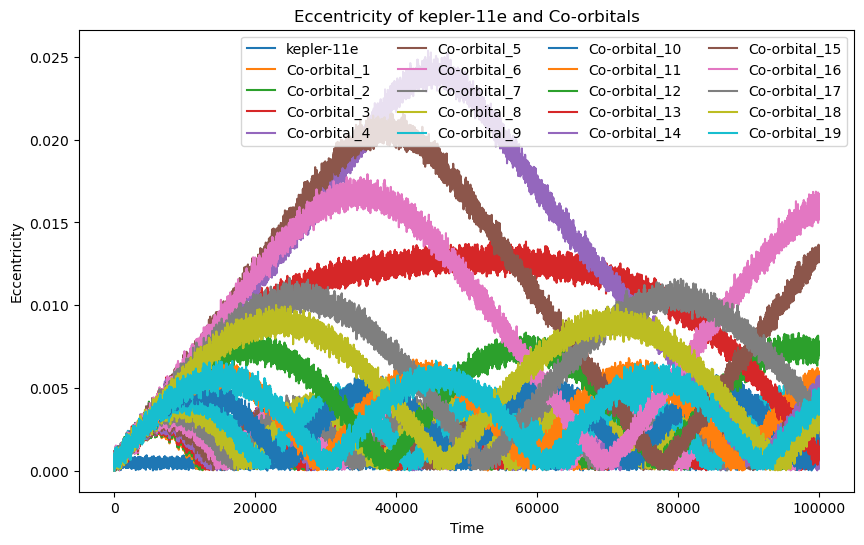

In [9]:
# filenames = ["kepler_11e.bin","kepler_11e.bin","kepler_11e.bin","kepler_11e.bin","kepler_11f.bin","kepler_11g.bin","kepler_11h.bin"]
filenames = ["kepler_11e.bin"]

for filename in filenames:
    sa = rebound.Simulationarchive(filename)

    tmax = sa.tmax
    tmin = sa.tmin
    nshots = len(sa)  # number of snapshots

    times = np.linspace(tmin, tmax, nshots)

    eccentricities = []   # Store eccentricity values for kepler-11e and its co-orbitals

    # Load in each snapshot
    for i in range(nshots):
        ps = sa[i].particles  # particles at snapshot i
        os = sa[i].orbits()#  # orbits relative to the primary particle

        # List to hold eccentricity for the current snapshot
        ecc_snapshot = []

        for j in range(len(os)):
            ecc_snapshot.append(os[j].e)

        # Append the list of eccentricities for the current snapshot
        eccentricities.append(ecc_snapshot)

    # Find the maximum number of orbital elements in any snapshot
    max_len = max(len(ecc) for ecc in eccentricities)

    # Pad eccentricity lists with NaN to make them all the same length
    eccentricities_padded = np.array([ecc + [np.nan]*(max_len - len(ecc)) for ecc in eccentricities])

    # Plot eccentricity versus time for kepler-11e and its co-orbitals
    plt.figure(figsize=(10, 6))
    plt.plot(times, eccentricities_padded[:, 3], label='kepler-11e')
    for j in range(7, max_len):  # Indices 7-26 represent co-orbitals
        plt.plot(times, eccentricities_padded[:, j], label=f'Co-orbital_{j-6}')  # Label starts from Co-orbital_1
    plt.xlabel('Time')
    plt.ylabel('Eccentricity')
    plt.title('Eccentricity of kepler-11e and Co-orbitals')
    plt.legend(ncol=4)  # Set the number of columns in the legend
    plt.savefig('11e_eccs.png')
    plt.show()

### kepler-11f

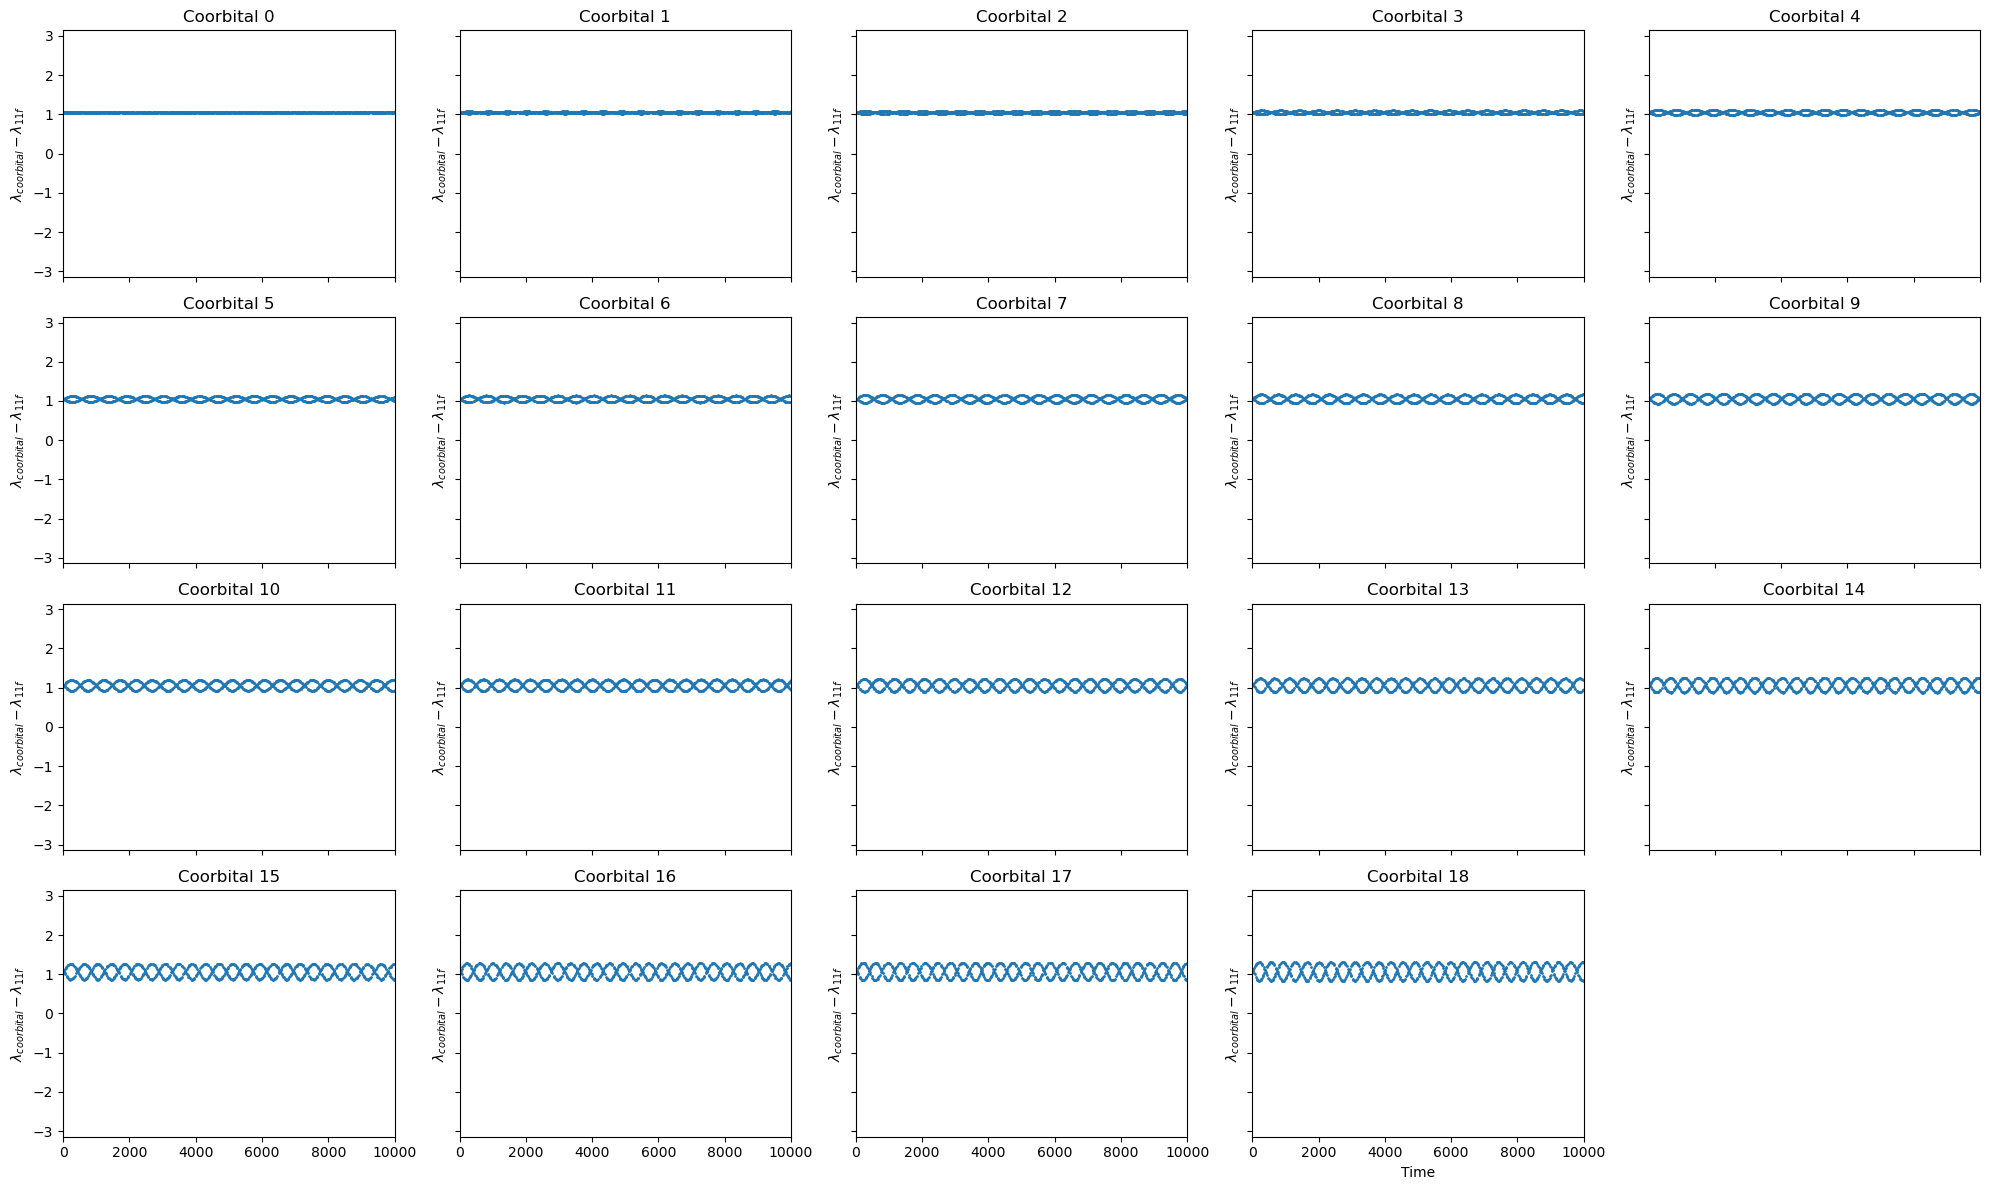

In [10]:
# Load the simulation archive
sa = rebound.Simulationarchive("kepler_11f.bin")

# Get the time range and number of snapshots
tmax = sa.tmax
tmin = sa.tmin
nshots = len(sa)

# Generate an array of times corresponding to the snapshots
times = np.linspace(tmin, tmax, nshots)

# Initialize a list to hold the mean longitude differences
mean_longitude_differences = []

# Iterate over each snapshot
for i in range(nshots):
    sim = sa[i]  # Load the i-th snapshot
    mean_longitudes = []

    # Extract mean longitudes for particles after the first 8 (sun and planets)
    for j in range(8, sim.N):
        particle = sim.particles[j]
        mean_longitudes.append(particle.l)

    # Calculate the mean longitude of kepler-11f (assumed to be the sixth particle, index 5)
    kepler_11f = sim.particles[5]
    kepler_11f_mean_longitude = kepler_11f.l

    # Calculate the differences and store them
    differences = np.array(mean_longitudes) - kepler_11f_mean_longitude
    mean_longitude_differences.append(differences)

# Determine the maximum number of particles across all snapshots
max_particles = max(len(d) for d in mean_longitude_differences)

# Pad arrays to ensure consistent length
mean_longitude_differences_padded = [np.pad(d, (0, max_particles - len(d)), 'constant', constant_values=np.nan) for d in mean_longitude_differences]

# Convert the list of arrays to a 2D array for plotting
mean_longitude_differences = np.array(mean_longitude_differences_padded)

# Determine the number of particles
n_particles = mean_longitude_differences.shape[1]

# Calculate the grid size for subplots
n_cols = 5
n_rows = (n_particles + n_cols - 1) // n_cols

# Create subplots
fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, 3*n_rows), sharex=True, sharey=True)

# Flatten the array of axes for easy iteration
axs = axs.flatten()

# Set y-axis limits
ymax = np.pi
ymin = -np.pi
xmin = tmin
xmax = 10000

# Plot each particle's mean longitude difference in a separate subplot
for i in range(n_particles):
    axs[i].plot(times, mean_longitude_differences[:, i], marker='o', markersize=1, linestyle='None')
    axs[i].set_ylabel(f'$\lambda_{{coorbital}} - \lambda_{{11f}}$')
    axs[i].set_title(f'Coorbital {i}')
    axs[i].set_ylim(ymin, ymax)
    axs[i].set_xlim(xmin, xmax)

# Remove empty subplots
for i in range(n_particles, len(axs)):
    fig.delaxes(axs[i])

# Set common x-axis label
plt.xlabel('Time')

# Adjust layout to prevent overlap
plt.tight_layout()

plt.savefig('11f_mean_long.png')

# Show the plot
plt.show()

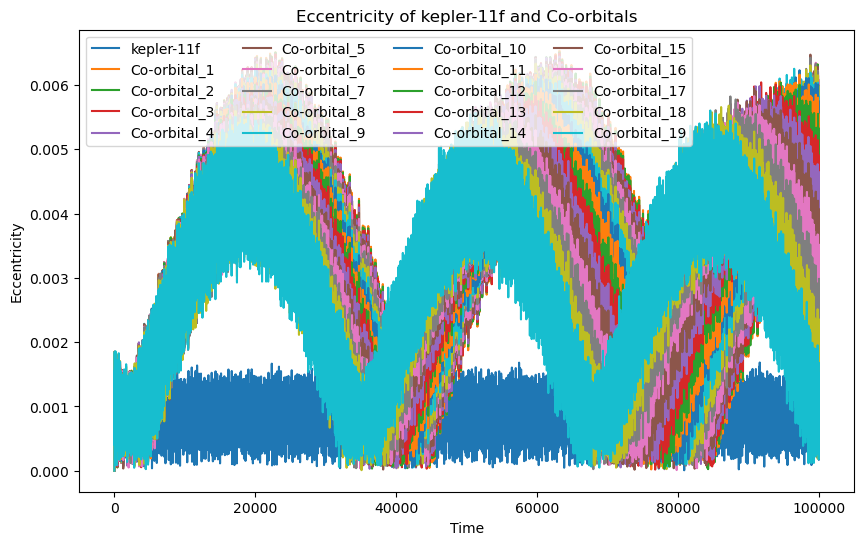

In [11]:
# filenames = ["kepler_11f.bin","kepler_11f.bin","kepler_11f.bin","kepler_11e.bin","kepler_11f.bin","kepler_11g.bin","kepler_11h.bin"]
filenames = ["kepler_11f.bin"]

for filename in filenames:
    sa = rebound.Simulationarchive(filename)

    tmax = sa.tmax
    tmin = sa.tmin
    nshots = len(sa)  # number of snapshots

    times = np.linspace(tmin, tmax, nshots)

    eccentricities = []   # Store eccentricity values for kepler-11f and its co-orbitals

    # Load in each snapshot
    for i in range(nshots):
        ps = sa[i].particles  # particles at snapshot i
        os = sa[i].orbits()#  # orbits relative to the primary particle

        # List to hold eccentricity for the current snapshot
        ecc_snapshot = []

        for j in range(len(os)):
            ecc_snapshot.append(os[j].e)

        # Append the list of eccentricities for the current snapshot
        eccentricities.append(ecc_snapshot)

    # Find the maximum number of orbital elements in any snapshot
    max_len = max(len(ecc) for ecc in eccentricities)

    # Pad eccentricity lists with NaN to make them all the same length
    eccentricities_padded = np.array([ecc + [np.nan]*(max_len - len(ecc)) for ecc in eccentricities])

    # Plot eccentricity versus time for kepler-11f and its co-orbitals
    plt.figure(figsize=(10, 6))
    plt.plot(times, eccentricities_padded[:, 4], label='kepler-11f')
    for j in range(7, max_len):  # Indices 7-26 represent co-orbitals
        plt.plot(times, eccentricities_padded[:, j], label=f'Co-orbital_{j-6}')  # Label starts from Co-orbital_1
    plt.xlabel('Time')
    plt.ylabel('Eccentricity')
    plt.title('Eccentricity of kepler-11f and Co-orbitals')
    plt.legend(ncol=4)  # Set the number of columns in the legend
    plt.savefig('11f_eccs.png')
    plt.show()

### kepler-11g

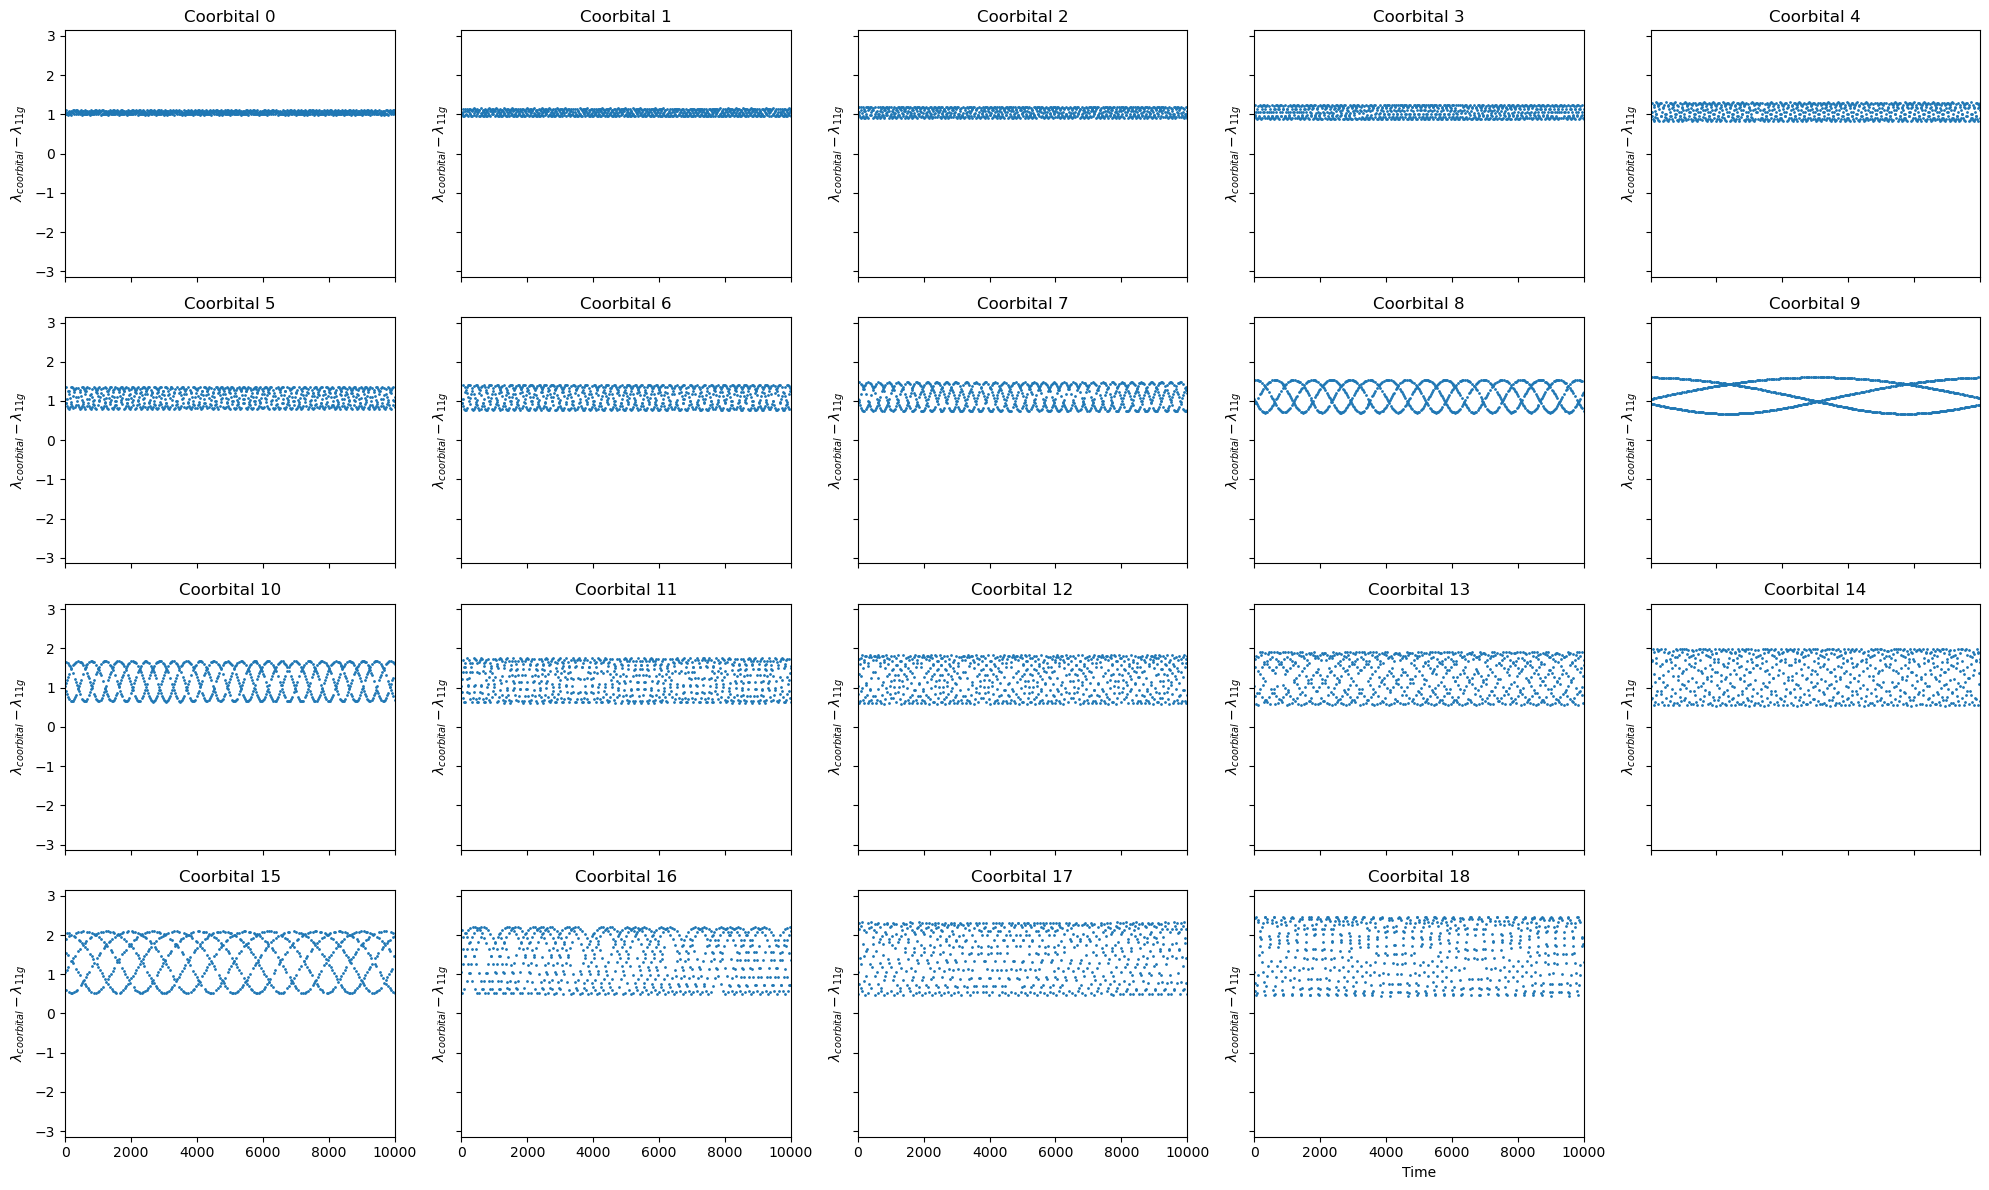

In [12]:
# Load the simulation archive
sa = rebound.Simulationarchive("kepler_11g.bin")

# Get the time range and number of snapshots
tmax = sa.tmax
tmin = sa.tmin
nshots = len(sa)

# Generate an array of times corresponding to the snapshots
times = np.linspace(tmin, tmax, nshots)

# Initialize a list to hold the mean longitude differences
mean_longitude_differences = []

# Iterate over each snapshot
for i in range(nshots):
    sim = sa[i]  # Load the i-th snapshot
    mean_longitudes = []

    # Extract mean longitudes for particles after the first 8 (sun and planets)
    for j in range(8, sim.N):
        particle = sim.particles[j]
        mean_longitudes.append(particle.l)

    # Calculate the mean longitude of kepler-11g (assumed to be the seventh particle, index 6)
    kepler_11g = sim.particles[6]
    kepler_11g_mean_longitude = kepler_11g.l

    # Calculate the differences and store them
    differences = np.array(mean_longitudes) - kepler_11g_mean_longitude
    mean_longitude_differences.append(differences)

# Determine the maximum number of particles across all snapshots
max_particles = max(len(d) for d in mean_longitude_differences)

# Pad arrays to ensure consistent length
mean_longitude_differences_padded = [np.pad(d, (0, max_particles - len(d)), 'constant', constant_values=np.nan) for d in mean_longitude_differences]

# Convert the list of arrays to a 2D array for plotting
mean_longitude_differences = np.array(mean_longitude_differences_padded)

# Determine the number of particles
n_particles = mean_longitude_differences.shape[1]

# Calculate the grid size for subplots
n_cols = 5
n_rows = (n_particles + n_cols - 1) // n_cols

# Create subplots
fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, 3*n_rows), sharex=True, sharey=True)

# Flatten the array of axes for easy iteration
axs = axs.flatten()

# Set y-axis limits
ymax = np.pi
ymin = -np.pi
xmin = tmin
xmax = 10000

# Plot each particle's mean longitude difference in a separate subplot
for i in range(n_particles):
    axs[i].plot(times, mean_longitude_differences[:, i], marker='o', markersize=1, linestyle='None')
    axs[i].set_ylabel(f'$\lambda_{{coorbital}} - \lambda_{{11g}}$')
    axs[i].set_title(f'Coorbital {i}')
    axs[i].set_ylim(ymin, ymax)
    axs[i].set_xlim(xmin, xmax)

# Remove empty subplots
for i in range(n_particles, len(axs)):
    fig.delaxes(axs[i])

# Set common x-axis label
plt.xlabel('Time')

# Adjust layout to prevent overlap
plt.tight_layout()

plt.savefig('11g_mean_long.png')

# Show the plot
plt.show()

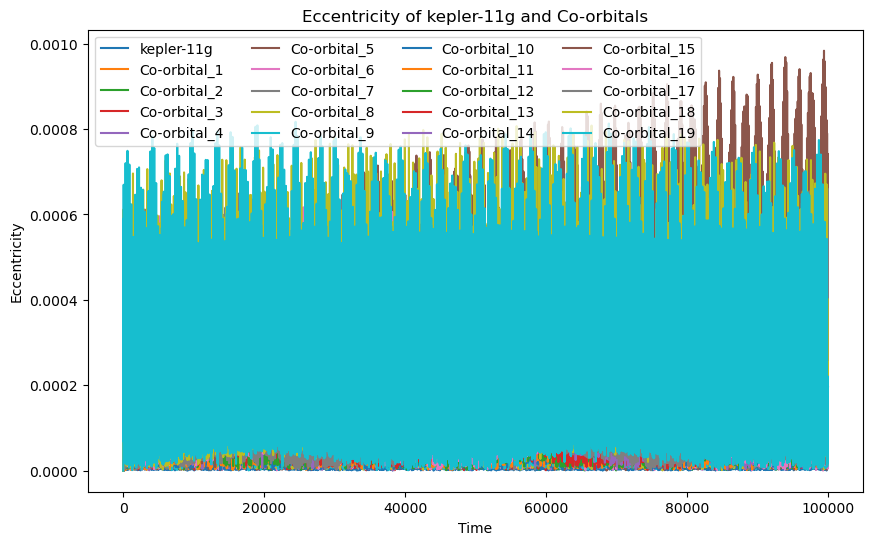

In [13]:
# filenames = ["kepler_11g.bin","kepler_11g.bin","kepler_11g.bin","kepler_11e.bin","kepler_11f.bin","kepler_11g.bin","kepler_11h.bin"]
filenames = ["kepler_11g.bin"]

for filename in filenames:
    sa = rebound.Simulationarchive(filename)

    tmax = sa.tmax
    tmin = sa.tmin
    nshots = len(sa)  # number of snapshots

    times = np.linspace(tmin, tmax, nshots)

    eccentricities = []   # Store eccentricity values for kepler-11g and its co-orbitals

    # Load in each snapshot
    for i in range(nshots):
        ps = sa[i].particles  # particles at snapshot i
        os = sa[i].orbits()#  # orbits relative to the primary particle

        # List to hold eccentricity for the current snapshot
        ecc_snapshot = []

        for j in range(len(os)):
            ecc_snapshot.append(os[j].e)

        # Append the list of eccentricities for the current snapshot
        eccentricities.append(ecc_snapshot)

    # Find the maximum number of orbital elements in any snapshot
    max_len = max(len(ecc) for ecc in eccentricities)

    # Pad eccentricity lists with NaN to make them all the same length
    eccentricities_padded = np.array([ecc + [np.nan]*(max_len - len(ecc)) for ecc in eccentricities])

    # Plot eccentricity versus time for kepler-11g and its co-orbitals
    plt.figure(figsize=(10, 6))
    plt.plot(times, eccentricities_padded[:, 5], label='kepler-11g')
    for j in range(7, max_len):  # Indices 7-26 represent co-orbitals
        plt.plot(times, eccentricities_padded[:, j], label=f'Co-orbital_{j-6}')  # Label starts from Co-orbital_1
    plt.xlabel('Time')
    plt.ylabel('Eccentricity')
    plt.title('Eccentricity of kepler-11g and Co-orbitals')
    plt.legend(ncol=4)  # Set the number of columns in the legend
    plt.savefig('11g_eccs.png')
    plt.show()